# Project #3: Sentiment Analysis of Reviews

**Name:** Gabriel George

**Date:** 12/1/24

**Excercise:** Project #3: Sentiment analysis of reviews

**Yelp Fusion API Data:** 


In [15]:
#Importing necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Set up API credentials
API_KEY = 'enter_here'
HEADERS = {'Authorization': f'Bearer {API_KEY}'}
SEARCH_URL = 'https://api.yelp.com/v3/businesses/search'
REVIEWS_URL = 'https://api.yelp.com/v3/businesses/{id}/reviews'

# Fetch business IDs
def search_businesses(term, location, limit=20):
    params = {'term': term, 'location': location, 'limit': limit}
    response = requests.get(SEARCH_URL, headers=HEADERS, params=params)
    return response.json()

# Fetch reviews for each business
def get_reviews(business_id):
    url = REVIEWS_URL.format(id=business_id)
    response = requests.get(url, headers=HEADERS)
    return response.json()

# Example: Search for businesses
business_data = search_businesses(term="coffee shops", location="New York", limit=20)
businesses = business_data.get('businesses', [])

# Gather reviews
reviews = []
for business in businesses[:20]:  # Limit to first 20 businesses
    business_reviews = get_reviews(business['id'])
    reviews.extend(business_reviews.get('reviews', []))

# Extract review text
review_texts = [review['text'] for review in reviews]
print(f"Fetched {len(review_texts)} reviews.")


Fetched 0 reviews.


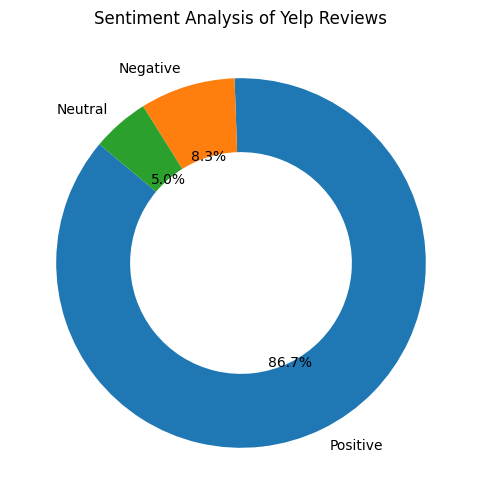

In [16]:
# Plotting the sentiment distribution
categories = sentiment_counts.index
counts = sentiment_counts.values

#Plotting the graph
plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=categories,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4)  
)
plt.title("Sentiment Analysis of Yelp Reviews")
plt.show()


In [17]:
# Performing sentiment analysis
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Analyzing each review
sentiments = []
for text in review_texts:
    polarity = TextBlob(text).sentiment.polarity
    sentiments.append(categorize_sentiment(polarity))

# Counting the sentiment categories
sentiment_counts = pd.Series(sentiments).value_counts()
print(sentiment_counts)


Series([], Name: count, dtype: int64)
